
# Data-Science-Blog-Post

 ## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

***
**In this project, I am analyzing the "No-show Appointments" dataset, A dataset that contains record from 
100k medical appointments in Brazil of 110527 patients from the period of April to June of 2016 year. Since missing a pre-scheduled appointment is a problmatic issue that results complications, the focus in this analysis will be on answering an important question; What factors or reasons make a patient show/not show to their pre-scheduled appointment? Hopfully, this analysis will lead to some sloutions to this problmatic issue. The dependent variable is weather the patient show/not show to their pre-scheduled appointment. This will be compared with three factors:**

   * wheather patient recieve SMS remainder or no.
   * wheather patient have Hipertention or does not.
   * wheather patient have a Scholarship or does not.
    

**Moreover, in this analysis I will invesigate wheather there is a correlation between the day of the appointment and the precence of the Patient. In other words, Do paitients miss their appointment on specific days? You might say paitents will more likely be missing their appointmet if the day of the appointment is on the end of the week. Another person could say paitents will more likely be missing their appointmet if the day of the appointment is on the first days of the week. <n>**

Lets See what the analysis lead us to!
    
***

In [292]:
# importing packages that will be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb



<a id='wrangling'></a>
## Data Wrangling

Data is loaded, read from a csv file.


In [293]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df2 = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning
The No Show Appointments dataset is pretty clean. It does not have missing valuse. However, Some datatypes need to be changed and some columns need to be deleted.

In [175]:
#gettinh the total number of rows and columns in the dataset.

df2.shape

(110527, 14)

In [230]:
#getting the data type of each column in the dataset.

df2.dtypes

Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                    int64
Year                       int64
Month                      int64
Day                       object
dtype: object

In [177]:
#getting general information of the dataset.

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [178]:
#deleting columns that will not be used in the analysis, AppointmentID + PatientId.


df2.drop("AppointmentID", axis=1, inplace=True)
df2.drop("PatientId", axis=1, inplace=True)
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [231]:
# extracting some detailes from existed columns and adding them as a column in the dataset


df2['Year'] = pd.DatetimeIndex(df2['AppointmentDay']).year
df2['Month'] = pd.DatetimeIndex(df2['AppointmentDay']).month
df2['Day'] = df2['AppointmentDay'].dt.day_name()

In [232]:
df2.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Year,Month,Day
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016,4,Friday
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016,4,Friday
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016,4,Friday
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016,4,Friday
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016,4,Friday


In [234]:
# Deleting columns that will not be used in the analysis.


df2.drop("AppointmentID", axis=1, inplace=True)
df2.drop("PatientId", axis=1, inplace=True)

In [ ]:
# Changing some data types to be more readable


df2['ScheduledDay'] = pd.to_datetime(df2['ScheduledDay'])
df2['AppointmentDay'] = pd.to_datetime(df2['AppointmentDay'])

In [235]:
# checking if the 'ScheduledDay' and 'AppointmentDay' converted to datetime

df2.dtypes

Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                    int64
Year                       int64
Month                      int64
Day                       object
dtype: object

In [236]:
df2.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Year,Month,Day
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016,4,Friday
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016,4,Friday
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016,4,Friday
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016,4,Friday
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016,4,Friday


In [ ]:
# changing the datatype from string to int
#   0 = showed up    1 = didnt show up

noshow = {'No': 0, 'Yes': 1}
df2['No-show'] = [noshow[item] for item in df2['No-show']]

In [238]:
# checking if the No-show column converted to int

df2.dtypes

Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                    int64
Year                       int64
Month                      int64
Day                       object
dtype: object

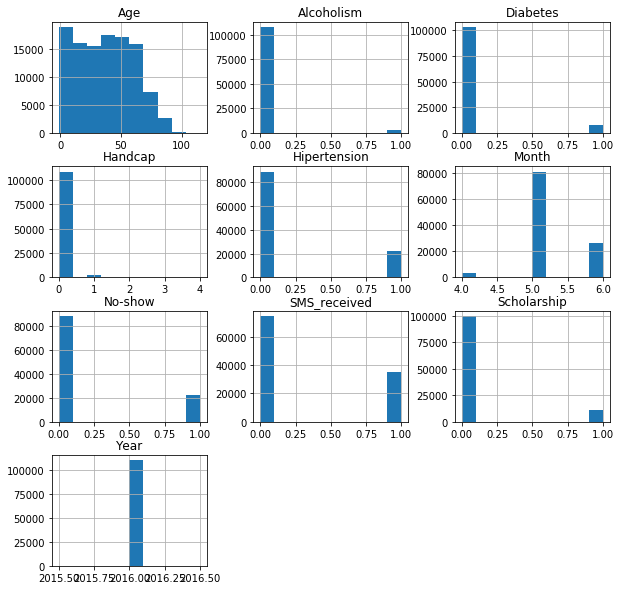

In [282]:
df2.hist(figsize = (10,10));

In [284]:
# Trying to find in which months this records were collected.
df2.groupby('Month').Month.count()

Month
4     3235
5    80841
6    26451
Name: Month, dtype: int64

In [290]:
# Trying to find in which year this records were collected.
df2.groupby('Year').Year.count()

Year
2016    110527
Name: Year, dtype: int64

In [294]:
unique_value = df2["Neighbourhood"].nunique()
print (unique_value)

81


<a id='eda'></a>

## Exploratory Data Analysis


### Research Question# 1 (Do Patients miss their appointment on specific days? )  


As shown in the bar chart, Tuesdays and Wednesday have the highest number of patients missing their prescheduled appointment, while Thuresdays have the lowest number of patients missing theirthier prescheduled appointment.

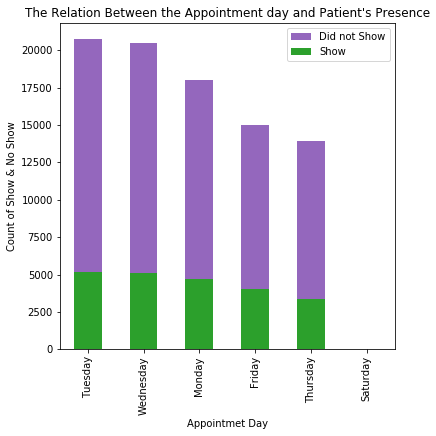

In [239]:
# creating variable that holds #of patients who showed up
# creating variable that holds #of patients who didnt show up
# 0 = Showed up    1 = did not show up

# creating a new dataframe that ON contains patients who did not show up to their appointment
df2_didnt_show_up = df2[df2['No-show'] == 1]
df2_showed_up = df2[df2['No-show'] == 0]

# plotting the "didnt_show_up" count in a bar chart based on the appointment day 

ax = pd.value_counts(df2_showed_up['Day']).plot.bar(color = 'C4')

# adding the plot of the "showed_up" count in the bar chart based on the appointment day 
pd.value_counts(df2_didnt_show_up['Day']).plot.bar(color = 'C2', ax=ax, figsize=[6,6])


# setting labels
plt.xlabel("Appointmet Day")
plt.legend(['Did not Show', 'Show'])
plt.ylabel ("Count of Show & No Show")
plt.title( "The Relation Between the Appointment day and Patient's Presence");



### Research Question# 2  (Do Patients who recieve SMS reminder show up to their appointment more than patients who did not recieve SMS? )



Surprisingly! The answer is No! The number of patients showed up to their appointment with SMS received is less than the number of patients showed up without SMS recieved. Thus, this analysis shows that sending a SMS reminder to paitents might not be that effective! A call might be more effective to make sure that the patient is reminded.
(The Rate is Shown in the Bar Chart below)

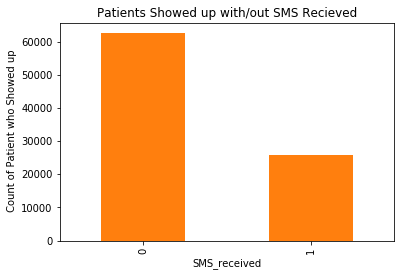

In [273]:
#counting the number of patients who showed up to their appointment based on weather they receieved SMS or no
# 0 = did not recieve SMS
# 1 = recieved SMS

df2[df2['No-show'] == 0].groupby('SMS_received').SMS_received.count().plot.bar(color = 'C1')

# setting labels
plt.xlabel("SMS_received")
plt.ylabel (" Count of Patient who Showed up")
plt.title( "Patients Showed up with/out SMS Recieved");


### Research Question# 3  ( Do Patients with Hypertension Stick to their Appointment more than Patients with no Hypertension? )

There is no clear corelation between patients with hypertension and patients with no hypertension. Before i start the invistigation, I thought that people with such a chronic disease,hypertension, will be more aware of missing their appointment given the fact that hypertension can lead to severe complications. (The Rate is Shown in the Bar Chart below)





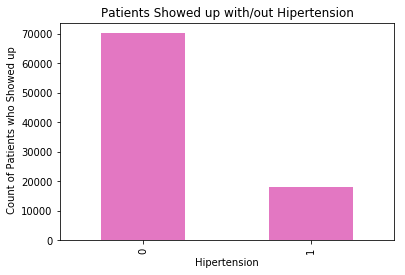

In [274]:
#counting the number of patients who showed up to their appointment based on whether patient is with/out Hipertension
df2[df2['No-show'] == 0] .groupby('Hipertension').Hipertension.count().plot.bar(color = 'C6')

# setting labels
plt.xlabel("Hipertension")
plt.ylabel (" Count of Patients who Showed up")
plt.title( "Patients Showed up with/out Hipertension");


### Research Question# 4  ( Do Patients with Scholarship Miss their Appointment more than Patients without  Scholarship?

Before starting the invistigation, I thought that paitents who have scholarship is more likely to miss their appointment. However, the investigation denies my thoughts. Paitents who have scholarship do not miss theirthier appointment more than those who does not have scholarship. This could be due to terms and regulations set by Scholarship. (The Rate is Shown in the Bar Chart below)


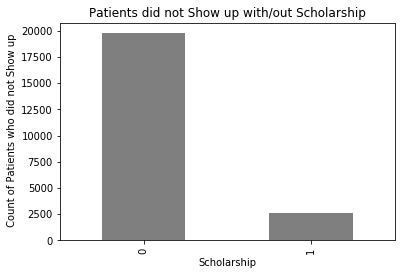

In [270]:
# 0 = without scholarship   1 = with scholarship
#  Trying to see if the number of patients with Scolarship is more likely to show up to their appointment or no
df2[df2['No-show'] == 1] .groupby('Scholarship').Scholarship.count().plot.bar(color = 'C8')

# setting labels
plt.xlabel("Scholarship")
plt.ylabel (" Count of Patients who did not Show up")
plt.title( "Patients did not Show up with/out Scholarship");

<a id='conclusions'></a>
## Conclusions


In conclusion, patients not showing up for appointments leads to various problems. For example, wasting time of doctors and other patients. In this Analysis, I used a record of 110527 patient from 100k medical appointments in Brazil that were collected from the period of April to June of 2016 year. The focus in this analysis is to answer an important question; What factors or reasons make a patient show/not show to their pre-scheduled appointment? Some surprising results were found this could be because the short period of the samples collected is not enough or because the months of the recordes collected are within the Summer holiday in Brazil. I believe six months at least is a good length for better and more accurate analysis.

 <n>   


